In [1]:
# visualizaiton function: stacked bar

import matplotlib.pyplot as plt
%matplotlib inline

def plot_feature(feature, ngroup, count0, count1, xlabel, title, xtick, ratio):
    fig, ax = plt.subplots(figsize=(6*ratio,6))
    p1 = ax.bar(list(range(ngroup)), count0, 0.35, label='<=50K')
    p2 = ax.bar(list(range(ngroup)), count1, 0.35, bottom=count0, label='>50K')
    ax.axhline(0, color='grey', linewidth=0.8)
    ax.set_ylabel('<=50K and >50K group %')
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.set_xticks(list(range(ngroup)))
    ax.set_xticklabels(xtick)
    ax.legend()
    ax.set_xlim([-0.5,ngroup+1])
    ax.set_ylim([0,109])

    ax.bar_label(p1, label_type='center')
    ax.bar_label(p2)
    #plt.savefig('./Figs/%s' %feature,dpi=500)
    plt.show()

In [2]:
# read data
file = open('adult.data')
raw_data = []
for line in file:
    line = line.rstrip()
    line_list = line.split(",")
    raw_data.append(line_list)
print("Number of Samples:", len(raw_data))
print("Number of Columns:", len(raw_data[0]))
print("The First Raw Sample:", raw_data[0])

# data representation
age=[]
workclass=[]
fnlwgt=[]
education=[]
education_num=[]
marital = []
occupation=[]
relation=[]
race=[]
sex=[]
cap_gain=[]
cap_loss=[]
hours_per_week=[]
native_country=[]
label=[]
for i in range(len(raw_data)):

    # feature 1
    age.append(float(raw_data[i][0]))
    # feature 2
    workclass.append(raw_data[i][1].strip())
    # feature 3
    fnlwgt.append(float(raw_data[i][2].strip()))
    # feature 4
    education.append(raw_data[i][3].strip())
    # feature 5
    education_num.append(float(raw_data[i][4].strip()))
    # feature 6
    marital.append(raw_data[i][5].strip())
    # feature 7
    occupation.append(raw_data[i][6].strip())
    # feature 8
    relation.append(raw_data[i][7].strip())
    # feature 9
    race.append(raw_data[i][8].strip())
    # feature 10
    sex.append(raw_data[i][9].strip())
    # feature 11
    cap_gain.append(float(raw_data[i][10].strip()))
    # feature 12
    cap_loss.append(float(raw_data[i][11].strip()))
    # feature 13
    hours_per_week.append(float(raw_data[i][12].strip()))
    # feature 14
    native_country.append(raw_data[i][13].strip())

    # label
    if raw_data[i][14] == raw_data[0][14]:
        label.append(0)
    else:
        label.append(1)

Number of Samples: 32561
Number of Columns: 15
The First Raw Sample: ['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married', ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0', ' 40', ' United-States', ' <=50K']


Age Range [17.000000, 90.000000]
[9890, 8565, 4484, 1580, 201]
[682, 3797, 2811, 511, 40]


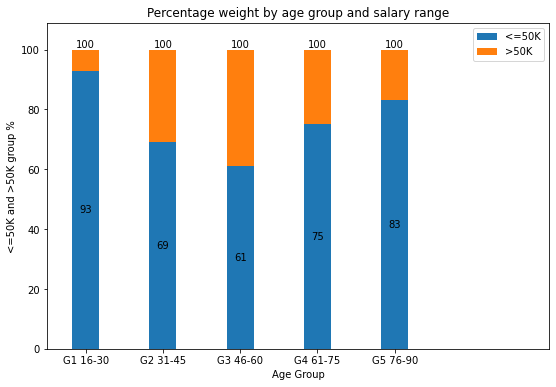

In [3]:
# feature 1: Age [17, 90]
print('Age Range [%f, %f]' %(min(age), max(age)))
ngroup = 5
count0 = [0]*ngroup
count1 = [0]*ngroup
for i in range(len(age)):
    igroup = int((age[i]-16)/15)
    if label[i]==0:
        count0[igroup] += 1
    else:
        count1[igroup] += 1
print(count0)
print(count1)
for i in range(ngroup):
    count0[i] = int(count0[i]/(count0[i] + count1[i])*100)
    count1[i] = 100 - count0[i]
xlabel = 'Age Group'
title = 'Percentage weight by age group and salary range'
xtick = ('G1 16-30','G2 31-45','G3 46-60','G4 61-75','G5 76-90')
plot_feature('age', ngroup, count0, count1, xlabel, title, xtick, 1.5)

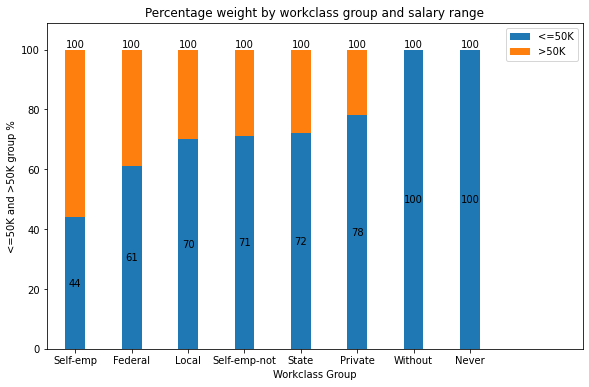

In [4]:
# feature 2: workclass
ngroup = 8
count0 = [0]*ngroup
count1 = [0]*ngroup
code = {'Private': 5, 'Self-emp-not-inc': 3, 'Self-emp-inc': 0, 'Federal-gov': 1,
 'Local-gov': 2, 'State-gov': 4, 'Without-pay': 6, 'Never-worked': 7}
for i in range(len(age)):
    if workclass[i] == '?':
        continue
    igroup = code[workclass[i]]

    if label[i]==0:
        count0[igroup] += 1
    else:
        count1[igroup] += 1
for i in range(ngroup):
    count0[i] = int(count0[i]/(count0[i] + count1[i])*100)
    count1[i] = 100 - count0[i]
#print(count0)
#print(count1)
xlabel = 'Workclass Group'
title = 'Percentage weight by workclass group and salary range'
xtick = ('Self-emp', 'Federal','Local','Self-emp-not','State','Private','Without','Never')
plot_feature('workclass', ngroup, count0, count1, xlabel, title, xtick, 1.6)

fnlwgt Range [12285.000000, 1484705.000000]
[4382, 10777, 6197, 3251, 113]
[1288, 3726, 1779, 1019, 29]


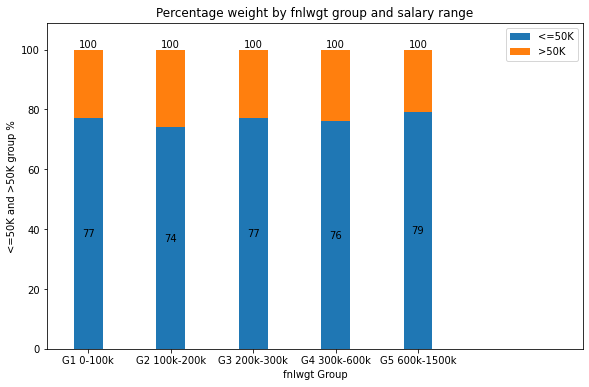

In [5]:
# feature 3: fnlwgt [12285, 1484705]
print('fnlwgt Range [%f, %f]' %(min(fnlwgt), max(fnlwgt)))
ngroup = 5
count0 = [0]*ngroup
count1 = [0]*ngroup
for i in range(len(age)):
    if fnlwgt[i]<100000:
        igroup=0
    elif fnlwgt[i]<200000:
        igroup=1
    elif fnlwgt[i]<300000:
        igroup=2
    elif fnlwgt[i]<600000:
        igroup=3
    else:
        igroup=4
    if label[i]==0:
        count0[igroup] += 1
    else:
        count1[igroup] += 1
print(count0)
print(count1)
for i in range(ngroup):
    count0[i] = int(count0[i]/(count0[i] + count1[i])*100)
    count1[i] = 100 - count0[i]
xlabel = 'fnlwgt Group'
title = 'Percentage weight by fnlwgt group and salary range'
xtick = ('G1 0-100k','G2 100k-200k','G3 200k-300k','G4 300k-600k','G5 600k-1500k')
plot_feature('fnlwgt', ngroup, count0, count1, xlabel, title, xtick, 1.6)

[107, 153, 764, 3134, 1021, 802, 5904, 8826, 400, 1115, 871, 487, 606, 317, 162, 51]
[306, 423, 959, 2221, 361, 265, 1387, 1675, 33, 60, 62, 27, 40, 16, 6, 0]


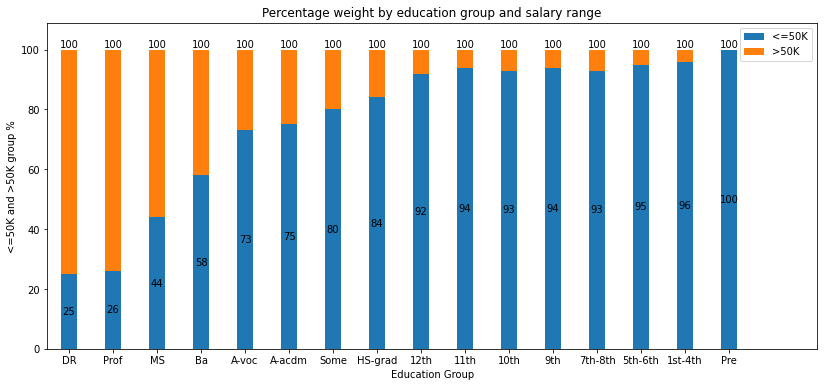

In [6]:
# feature 4: education
ngroup = 16
count0 = [0]*ngroup
count1 = [0]*ngroup
code = {'Bachelors': 3, 'Some-college': 6, '11th': 9, 'HS-grad': 7, 'Prof-school': 1,
'Assoc-acdm': 5, 'Assoc-voc': 4, '9th': 11, '7th-8th': 12, '12th': 8, 'Masters': 2, '1st-4th': 14,
'10th': 10, 'Doctorate': 0, '5th-6th': 13, 'Preschool': 15}
for i in range(len(age)):
    if education[i] == '?':
        continue
    igroup = code[education[i]]

    if label[i]==0:
        count0[igroup] += 1
    else:
        count1[igroup] += 1
print(count0)
print(count1)
for i in range(ngroup):
    count0[i] = int(count0[i]/(count0[i] + count1[i])*100)
    count1[i] = 100 - count0[i]
xlabel = 'Education Group'
title = 'Percentage weight by education group and salary range'
xtick = ('DR','Prof','MS','Ba','A-voc','A-acdm','Some','HS-grad','12th','11th','10th',
'9th','7th-8th','5th-6th','1st-4th','Pre')
plot_feature('education', ngroup, count0, count1, xlabel, title, xtick, 2.3)

education_num Range [1, 16]
[213, 923, 1358, 1515, 14730, 1823, 3898, 260]
[6, 56, 89, 93, 3062, 626, 3180, 729]


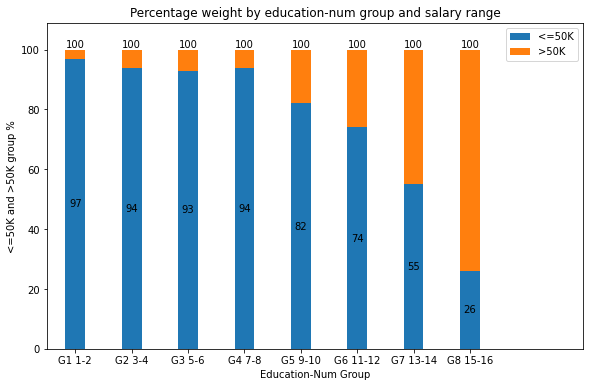

In [7]:
# feature 5: education-num [1, 16]
print('education_num Range [%d, %d]' %(min(education_num), max(education_num)))
ngroup = 8
count0 = [0]*ngroup
count1 = [0]*ngroup
for i in range(len(age)):
    igroup = int((education_num[i]-1)/2)
    if label[i]==0:
        count0[igroup] += 1
    else:
        count1[igroup] += 1
print(count0)
print(count1)
for i in range(ngroup):
    count0[i] = int(count0[i]/(count0[i] + count1[i])*100)
    count1[i] = 100 - count0[i]
xlabel = 'Education-Num Group'
title = 'Percentage weight by education-num group and salary range'
xtick = ('G1 1-2','G2 3-4','G3 5-6','G4 7-8','G5 9-10','G6 11-12','G7 13-14','G8 15-16')
plot_feature('education-num', ngroup, count0, count1, xlabel, title, xtick, 1.6)

[55, 56, 89, 91, 91, 93, 95]
[45, 44, 11, 9, 9, 7, 5]


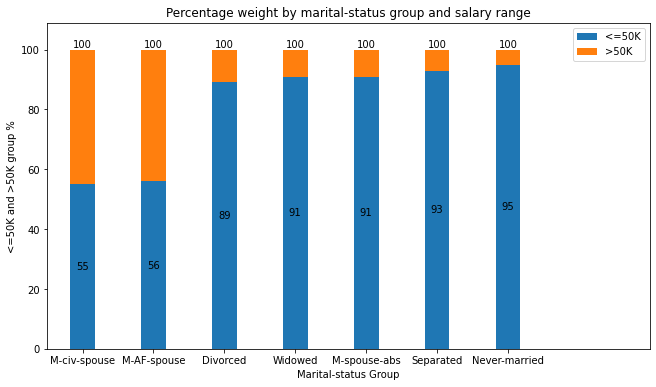

In [8]:
# feature 6: marital-status
ngroup = 7
count0 = [0]*ngroup
count1 = [0]*ngroup
code = {'Married-civ-spouse': 0, 'Divorced': 2, 'Never-married': 6, 'Separated': 5,
'Widowed': 3, 'Married-spouse-absent': 4, 'Married-AF-spouse': 1}
for i in range(len(age)):
    if marital[i] == '?':
        continue
    igroup = code[marital[i]]

    if label[i]==0:
        count0[igroup] += 1
    else:
        count1[igroup] += 1
for i in range(ngroup):
    count0[i] = int(count0[i]/(count0[i] + count1[i])*100)
    count1[i] = 100 - count0[i]
print(count0)
print(count1)
xlabel = 'Marital-status Group'
title = 'Percentage weight by marital-status group and salary range'
xtick = ('M-civ-spouse', 'M-AF-spouse', 'Divorced', 'Widowed', 'M-spouse-abs', 'Separated', 'Never-married')
plot_feature('marital-status', ngroup, count0, count1, xlabel, title, xtick, 1.8)

[51, 55, 67, 69, 73, 77, 79, 86, 87, 88, 88, 93, 95, 99]
[49, 45, 33, 31, 27, 23, 21, 14, 13, 12, 12, 7, 5, 1]


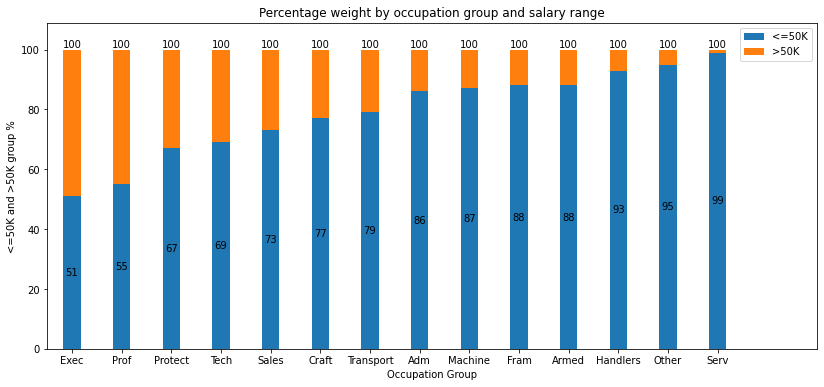

In [9]:
# feature 7: occupation
ngroup = 14
count0 = [0]*ngroup
count1 = [0]*ngroup
code = {'Tech-support': 3, 'Craft-repair': 5, 'Other-service': 12, 'Sales': 4, 'Exec-managerial': 0,
'Prof-specialty': 1, 'Handlers-cleaners': 11, 'Machine-op-inspct': 8, 'Adm-clerical': 7,
'Farming-fishing': 9, 'Transport-moving': 6, 'Priv-house-serv': 13, 'Protective-serv': 2,
'Armed-Forces': 10}
for i in range(len(age)):
    if occupation[i] == '?':
        continue
    igroup = code[occupation[i]]

    if label[i]==0:
        count0[igroup] += 1
    else:
        count1[igroup] += 1
for i in range(ngroup):
    count0[i] = int(count0[i]/(count0[i] + count1[i])*100)
    count1[i] = 100 - count0[i]
print(count0)
print(count1)
xlabel = 'Occupation Group'
title = 'Percentage weight by occupation group and salary range'
xtick = ('Exec', 'Prof', 'Protect', 'Tech', 'Sales', 'Craft', 'Transport', 'Adm', 'Machine', 'Fram',
'Armed', 'Handlers', 'Other', 'Serv')
plot_feature('occupation', ngroup, count0, count1, xlabel, title, xtick, 2.3)

[52, 55, 89, 93, 96, 98]
[48, 45, 11, 7, 4, 2]


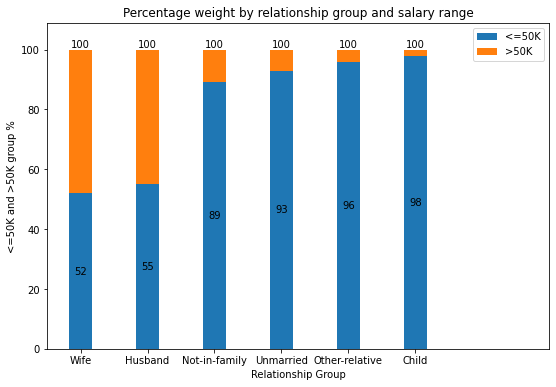

In [10]:
# feature 8: relationship
ngroup = 6
count0 = [0]*ngroup
count1 = [0]*ngroup
code = {'Wife': 0, 'Own-child': 5, 'Husband': 1, 'Not-in-family': 2,
'Other-relative': 4, 'Unmarried': 3}
for i in range(len(age)):
    if relation[i] == '?':
        continue
    igroup = code[relation[i]]

    if label[i]==0:
        count0[igroup] += 1
    else:
        count1[igroup] += 1
for i in range(ngroup):
    count0[i] = int(count0[i]/(count0[i] + count1[i])*100)
    count1[i] = 100 - count0[i]
print(count0)
print(count1)
xlabel = 'Relationship Group'
title = 'Percentage weight by relationship group and salary range'
xtick = ('Wife', 'Husband', 'Not-in-family', 'Unmarried', 'Other-relative', 'Child')
plot_feature('relationship', ngroup, count0, count1, xlabel, title, xtick, 1.5)

[74, 73, 88, 90, 87]
[26, 27, 12, 10, 13]


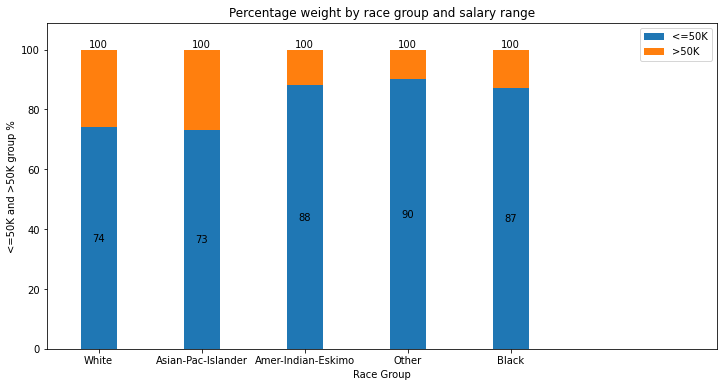

In [11]:
# feature 9: race
ngroup = 5
count0 = [0]*ngroup
count1 = [0]*ngroup
code = {'White': 0, 'Asian-Pac-Islander': 1, 'Amer-Indian-Eskimo': 2, 'Other': 3, 'Black': 4}
for i in range(len(age)):
    if race[i] == '?':
        continue
    igroup = code[race[i]]

    if label[i]==0:
        count0[igroup] += 1
    else:
        count1[igroup] += 1
for i in range(ngroup):
    count0[i] = int(count0[i]/(count0[i] + count1[i])*100)
    count1[i] = 100 - count0[i]
print(count0)
print(count1)
xlabel = 'Race Group'
title = 'Percentage weight by race group and salary range'
xtick = code.keys()
plot_feature('race', ngroup, count0, count1, xlabel, title, xtick, 2)

[89, 69]
[11, 31]


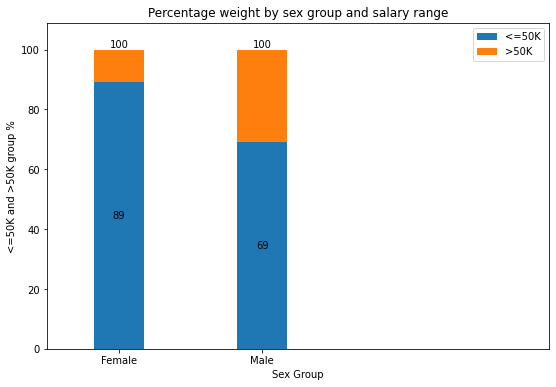

In [12]:
# feature 10: sex
ngroup = 2
count0 = [0]*ngroup
count1 = [0]*ngroup
code = {'Female': 0, 'Male': 1}
for i in range(len(age)):
    if sex[i] == '?':
        continue
    igroup = code[sex[i]]

    if label[i]==0:
        count0[igroup] += 1
    else:
        count1[igroup] += 1
for i in range(ngroup):
    count0[i] = int(count0[i]/(count0[i] + count1[i])*100)
    count1[i] = 100 - count0[i]
print(count0)
print(count1)
xlabel = 'Sex Group'
title = 'Percentage weight by sex group and salary range'
xtick = code.keys()
plot_feature('sex', ngroup, count0, count1, xlabel, title, xtick, 1.5)

Capital-gain Range [0.000000, 99999.000000]
[23685, 55, 95, 733, 152]
[6164, 0, 0, 181, 1496]


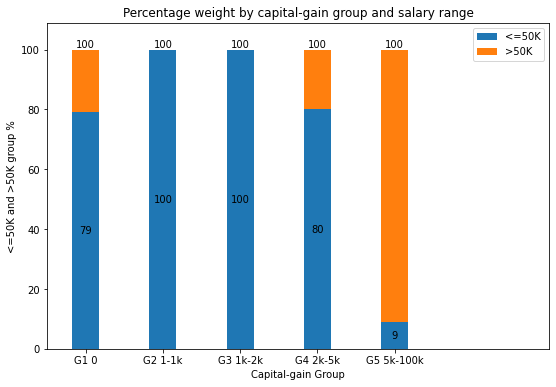

In [13]:
# feature 11: Capital-gain [0, 99999]
print('Capital-gain Range [%f, %f]' %(min(cap_gain), max(cap_gain)))
ngroup = 5
count0 = [0]*ngroup
count1 = [0]*ngroup
for i in range(len(age)):
    if cap_gain[i]==0:
        igroup=0
    elif cap_gain[i]<1000:
        igroup=1
    elif cap_gain[i]<2000:
        igroup=2
    elif cap_gain[i]<5000:
        igroup=3
    else:
        igroup=4
    if label[i]==0:
        count0[igroup] += 1
    else:
        count1[igroup] += 1
print(count0)
print(count1)
for i in range(ngroup):
    count0[i] = int(count0[i]/(count0[i] + count1[i])*100)
    count1[i] = 100 - count0[i]
xlabel = 'Capital-gain Group'
title = 'Percentage weight by capital-gain group and salary range'
xtick = ('G1 0','G2 1-1k','G3 1k-2k','G4 2k-5k','G5 5k-100k')
plot_feature('capital-gain', ngroup, count0, count1, xlabel, title, xtick, 1.5)

Capital-loss Range [0.000000, 4356.000000]
[23974, 34, 529, 175, 5, 3]
[7068, 2, 629, 139, 3, 0]


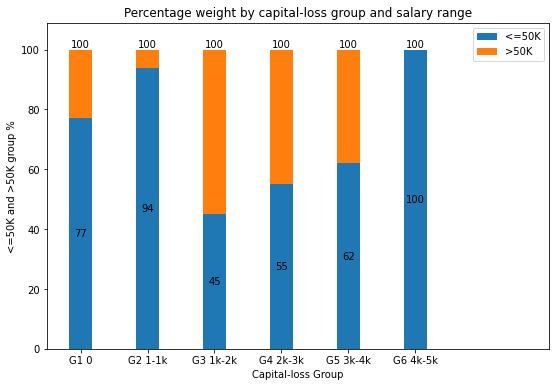

In [14]:
# feature 12: Capital-loss [0, 4356]
print('Capital-loss Range [%f, %f]' %(min(cap_loss), max(cap_loss)))
ngroup = 6
count0 = [0]*ngroup
count1 = [0]*ngroup
for i in range(len(age)):
    if cap_loss[i]==0:
        igroup=0
    elif cap_loss[i]<1000:
        igroup=1
    elif cap_loss[i]<2000:
        igroup=2
    elif cap_loss[i]<3000:
        igroup=3
    elif cap_loss[i]<4000:
        igroup=4
    else:
        igroup=5
    if label[i]==0:
        count0[igroup] += 1
    else:
        count1[igroup] += 1
print(count0)
print(count1)
for i in range(ngroup):
    count0[i] = int(count0[i]/(count0[i] + count1[i])*100)
    count1[i] = 100 - count0[i]
xlabel = 'Capital-loss Group'
title = 'Percentage weight by capital-loss group and salary range'
xtick = ('G1 0','G2 1-1k','G3 1k-2k','G4 2k-3k','G5 3k-4k','G6 4k-5k')
plot_feature('capital-loss', ngroup, count0, count1, xlabel, title, xtick, 1.5)

hours_per_week Range [1.000000, 99.000000]
[6994, 12001, 5725]
[731, 3254, 3856]


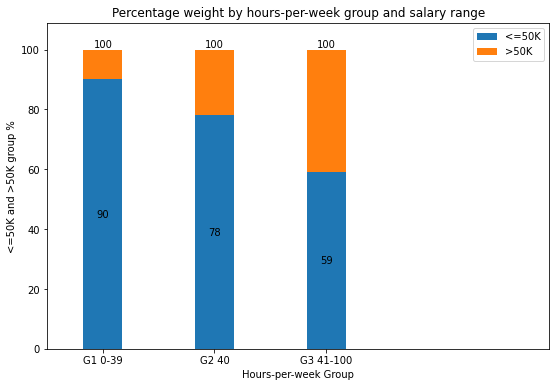

In [15]:
# feature 13: hours_per_week [1, 99]
print('hours_per_week Range [%f, %f]' %(min(hours_per_week), max(hours_per_week)))
ngroup = 3
count0 = [0]*ngroup
count1 = [0]*ngroup
for i in range(len(age)):
    if hours_per_week[i]<39:
        igroup=0
    elif hours_per_week[i]<41:
        igroup=1
    else:
        igroup=2
    if label[i]==0:
        count0[igroup] += 1
    else:
        count1[igroup] += 1
print(count0)
print(count1)
for i in range(ngroup):
    count0[i] = int(count0[i]/(count0[i] + count1[i])*100)
    count1[i] = 100 - count0[i]
xlabel = 'Hours-per-week Group'
title = 'Percentage weight by hours-per-week group and salary range'
xtick = ('G1 0-39','G2 40','G3 41-100')
plot_feature('hours-per-week', ngroup, count0, count1, xlabel, title, xtick, 1.5)

[58, 60, 61, 63, 65, 66, 67, 67, 69, 72, 73, 73, 75, 80, 80, 87, 89, 92, 92, 94]
[42, 40, 39, 37, 35, 34, 33, 33, 31, 28, 27, 27, 25, 20, 20, 13, 11, 8, 8, 6]


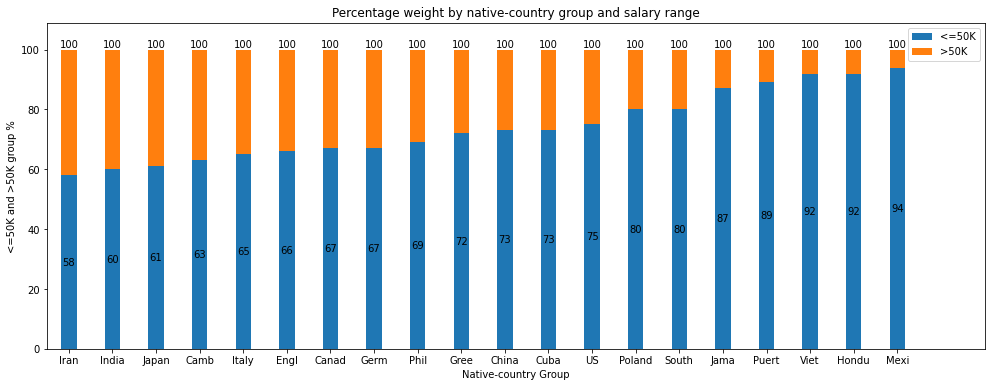

In [16]:
# feature 14: native-country
ngroup = 20
count0 = [0]*ngroup
count1 = [0]*ngroup
code = {'United-States': 12, 'Cambodia': 3, 'England': 5, 'Puerto-Rico': 16, 'Canada': 6,
'Germany': 7, 'India': 1, 'Japan': 2, 'Greece': 9, 'South': 14, 'China': 10, 'Cuba': 11,
'Iran': 0, 'Honduras': 18, 'Philippines': 8, 'Italy': 4, 'Poland': 13, 'Jamaica': 15,
'Vietnam': 17, 'Mexico': 19}
for i in range(len(age)):
    if native_country[i] == '?':
        continue
    if native_country[i] not in code:
        continue
    igroup = code[native_country[i]]

    if label[i]==0:
        count0[igroup] += 1
    else:
        count1[igroup] += 1
for i in range(ngroup):
    count0[i] = int(count0[i]/(count0[i] + count1[i])*100)
    count1[i] = 100 - count0[i]
print(count0)
print(count1)
xlabel = 'Native-country Group'
title = 'Percentage weight by native-country group and salary range'
xtick = ('Iran','India','Japan','Camb','Italy','Engl','Canad','Germ','Phil','Gree',
'China','Cuba','US','Poland','South','Jama','Puert','Viet','Hondu','Mexi')
plot_feature('native-country', ngroup, count0, count1, xlabel, title, xtick, 2.8)

In [17]:
# Machine learning

from sklearn import tree
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

code_workclass = {'Private': 5, 'Self-emp-not-inc': 3, 'Self-emp-inc': 0, 'Federal-gov': 1,
 'Local-gov': 2, 'State-gov': 4, 'Without-pay': 6, 'Never-worked': 7, '?': 8}
code_occupation = {'Tech-support': 3, 'Craft-repair': 5, 'Other-service': 12, 'Sales': 4, 'Exec-managerial': 0,
'Prof-specialty': 1, 'Handlers-cleaners': 11, 'Machine-op-inspct': 8, 'Adm-clerical': 7,
'Farming-fishing': 9, 'Transport-moving': 6, 'Priv-house-serv': 13, 'Protective-serv': 2,
'Armed-Forces': 10, '?': 14}
code_relationship = {'Wife': 0, 'Own-child': 5, 'Husband': 1, 'Not-in-family': 2,
'Other-relative': 4, 'Unmarried': 3}
code_sex = {'Female': 0, 'Male': 1}
code_education = {'Bachelors': 3, 'Some-college': 6, '11th': 9, 'HS-grad': 7, 'Prof-school': 1,
'Assoc-acdm': 5, 'Assoc-voc': 4, '9th': 11, '7th-8th': 12, '12th': 8, 'Masters': 2, '1st-4th': 14,
'10th': 10, 'Doctorate': 0, '5th-6th': 13, 'Preschool': 15}
code_marital = {'Married-civ-spouse': 0, 'Divorced': 2, 'Never-married': 6, 'Separated': 5,
'Widowed': 3, 'Married-spouse-absent': 4, 'Married-AF-spouse': 1}

# train and test data preparation
data = []
for i in range(len(age)):
    sample = [age[i], code_workclass[workclass[i]], education_num[i], code_occupation[occupation[i]], 
              code_relationship[relation[i]], code_sex[sex[i]], hours_per_week[i], code_marital[marital[i]]]
    data.append(sample)
print(data[:2])
scaler = MinMaxScaler()
scaler.fit(data)
data = scaler.transform(data)
print(data[:2])

sep_ratio=0.8
train_x = []
train_y = []
test_x = []
test_y = []

train_n = int(sep_ratio*len(age))
for i in range(train_n):
    train_x.append(data[i])
    train_y.append(label[i])
for i in range(train_n, len(age)):
    test_x.append(data[i])
    test_y.append(label[i])

[[39.0, 4, 13.0, 7, 2, 1, 40.0, 6], [50.0, 3, 13.0, 0, 1, 1, 13.0, 0]]
[[0.30136986 0.5        0.8        0.5        0.4        1.
  0.39795918 1.        ]
 [0.45205479 0.375      0.8        0.         0.2        1.
  0.12244898 0.        ]]


In [18]:
# define function for accuracy calculation
def cal_metrics(test_y,pred_y,info):
    tp=0
    fn=0
    fp=0
    tn=0
    for i in range(len(test_y)):
        if test_y[i]==1:
            if pred_y[i]==1:
                tp+=1
            else:
                fn+=1
        else:
            if pred_y[i]==1:
                fp+=1
            else:
                tn+=1
    a=(tp+tn)/(tp+fn+fp+tn)
    p=tp/(tp+fp)
    r=tp/(tp+fn)
    f1=2.*r*p/(r+p)
    matrix=[[tp,fn],[fp,tn]]

    print(info+':\n')
    print('     Accuracy=%.2f\n     Precision=%.2f\n     Recall=%.2f\n     F1 Score=%.2f' %(a,p,r,f1))
    print('\n')

In [19]:
# decision tree
tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(train_x, train_y)
pred_y = tree_clf.predict(test_x)
cal_metrics(test_y, pred_y, 'Decision Tree Classifier')

Decision Tree Classifier:

     Accuracy=0.79
     Precision=0.57
     Recall=0.54
     F1 Score=0.56




In [20]:
# svm
svm_clf = svm.SVC()
svm_clf.fit(train_x, train_y)
pred_y = svm_clf.predict(test_x)
cal_metrics(test_y, pred_y, 'SVM')

SVM:

     Accuracy=0.83
     Precision=0.72
     Recall=0.51
     F1 Score=0.60




In [21]:
# Neural Network Classifier
nn_clf = MLPClassifier(solver='lbfgs', alpha=1e-6, hidden_layer_sizes=(15,2), random_state=1, max_iter=1000)
nn_clf.fit(train_x, train_y)
nn_clf.predict(test_x)
cal_metrics(test_y, pred_y, 'Neural Network Classifier')

Neural Network Classifier:

     Accuracy=0.83
     Precision=0.72
     Recall=0.51
     F1 Score=0.60


